## Data Science Academy
## Fundamentos de Linguagem Python Para Análise de Dados e Data Science
## Introdução a Deep Learning com Tensorflow

In [1]:
# Imports
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
# Carrega o dataset CIFAR-10
(imagens_treino, labels_treino), (imagens_teste, labels_teste) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
# Classes das imagens
nome_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
# Normaliza os valores dos pixels para que os dados fiquem na mesma escala
imagens_treino = imagens_treino / 225.0
imagens_teste = imagens_teste / 225.0

In [5]:
# Função para exibir as imagens
def visualiza_imagens(images, labels):
  plt.figure(figsize=(10,10))
  for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(nome_classes[labels[i][0]])
  plt.show()

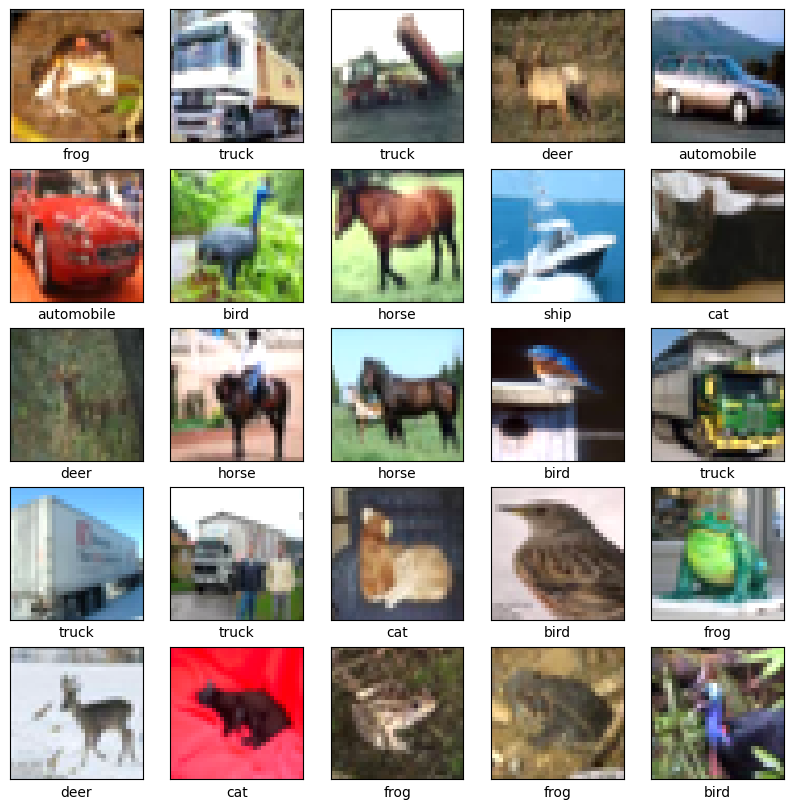

In [6]:
# Executa a função
visualiza_imagens(imagens_treino, labels_treino)

In [8]:
#Modelo

# Cria o objeto de sequência de camadas
modelo_dsa = models.Sequential()

#Adiciona o primeiro bloco de convolução e max pooling (camada de entrada)
modelo_dsa.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape =(32, 32, 3)))
modelo_dsa.add(layers.MaxPooling2D((2, 2)))

#Adiciona o segundo bloco de convolução e max pooling (camada intermediária)
modelo_dsa.add(layers.Conv2D(64, (3,3), activation="relu"))
modelo_dsa.add(layers.MaxPooling2D((2, 2)))

#Adiciona o terceiro bloco de convolução e max pooling (camada intermediária)
modelo_dsa.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo_dsa.add(layers.MaxPooling2D((2, 2)))

In [9]:
# Adiciona camada de classificação
modelo_dsa.add(layers.Flatten())
modelo_dsa.add(layers.Dense(64, activation ='relu'))
modelo_dsa.add(layers.Dense(10, activation='softmax'))

In [10]:
# Sumário do modelo
modelo_dsa.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 2, 2, 64)        

In [11]:
# Compilação do modelo
modelo_dsa.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

In [12]:
%%time
history=modelo_dsa.fit(imagens_treino,
                       labels_treino,
                       epochs=10,
                       validation_data=(imagens_teste,labels_teste))

Epoch 1/10
1563/1563 [==============================] - 92s 58ms/step - loss: 1.5585 - accuracy: 0.4297 - val_loss: 1.3183 - val_accuracy: 0.5234
Epoch 2/10
1563/1563 [==============================] - 84s 54ms/step - loss: 1.2098 - accuracy: 0.5706 - val_loss: 1.1394 - val_accuracy: 0.5974
Epoch 3/10
1563/1563 [==============================] - 83s 53ms/step - loss: 1.0678 - accuracy: 0.6260 - val_loss: 1.0710 - val_accuracy: 0.6244
Epoch 4/10
1563/1563 [==============================] - 88s 56ms/step - loss: 0.9798 - accuracy: 0.6583 - val_loss: 1.0198 - val_accuracy: 0.6429
Epoch 5/10
1563/1563 [==============================] - 83s 53ms/step - loss: 0.9100 - accuracy: 0.6820 - val_loss: 0.9724 - val_accuracy: 0.6637
Epoch 6/10
1563/1563 [==============================] - 83s 53ms/step - loss: 0.8561 - accuracy: 0.7011 - val_loss: 0.9631 - val_accuracy: 0.6730
Epoch 7/10
1563/1563 [==============================] - 87s 56ms/step - loss: 0.8098 - accuracy: 0.7165 - val_loss: 0.9651 -

In [13]:
# Avalia o modelo
erro_teste, acc_teste = modelo_dsa.evaluate(imagens_teste, labels_teste, verbose=2)
print('\nAcurácia com Dados de Teste:', acc_teste)

313/313 - 4s - loss: 0.8956 - accuracy: 0.6989 - 4s/epoch - 13ms/step

Acurácia com Dados de Teste: 0.6988999843597412


In [14]:
# Carrega uma nova imagem
nova_imagem = Image.open("/content/dados/nova_imagem.jpg")

In [15]:
# Dimensões da imagem (em pixels)
nova_imagem.size

(1919, 1199)

In [16]:
# Obtém largura e altura da imagem
largura = nova_imagem.width
altura = nova_imagem.height

print("A largura da imagem é: ", largura)
print("A altura da imagem é: ", altura)

A largura da imagem é:  1919
A altura da imagem é:  1199


In [17]:
# Redimensiona para 32x32
nova_imagem = nova_imagem.resize((32, 32))

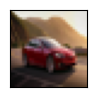

In [18]:
# Exibir a imagem
plt.figure(figsize=(1,1))
plt.imshow(nova_imagem)
plt.xticks([])
plt.yticks([])
plt.show()

In [19]:
# Converte a imagem para um array NumPy e normaliza
nova_imagem_array = np.array(nova_imagem) / 255.0

In [20]:
# Expande a dimensão do array para que ele tenha o formato (1, 32, 32, 3)
nova_imagem_array =np.expand_dims(nova_imagem_array, axis=0)

In [21]:
#Previsões
previsoes = modelo_dsa.predict(nova_imagem_array)
print(previsoes)

1/1 [==============================] - 0s 126ms/step
[[8.53042366e-05 9.96994853e-01 1.21760415e-04 3.21840275e-06
  4.87230272e-06 2.06947789e-05 3.62675812e-04 1.96831110e-07
  1.32511705e-04 2.27387529e-03]]


In [23]:
# Obtém a classe com maior probabilidade e o nome da classe
classe_prevista = np.argmax(previsoes)
nome_classe_prevista = nome_classes[classe_prevista]
print("A nova imagem foi classificada como:", nome_classe_prevista)

A nova imagem foi classificada como: automobile
